In [1]:
from intercode import Intercode

import scanpy as sc
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (7, 7)
mpl.rcParams['figure.dpi'] = 100

### Load and preprocess data

In [3]:
# preprocessed Kang18 dataset (log transformed, highly variable genes) 
# with reactome annotations in adata.varm['I']
# download dataset - https://drive.google.com/file/d/1BWdDg4mW0wSvZxDFMh0EcG-gLGQ5PllN/view?usp=sharing
adata = sc.read('kang_count_proc.h5ad')

In [4]:
select_genes = adata.varm['I'].sum(1)>0
adata._inplace_subset_var(select_genes)
adata.X-=adata.X.mean(0)

### Get intercode latent representation

In [5]:
LR = 0.001
BATCH_SIZE = 62
N_EPOCHS = 80

# regularization hyperparameters
# lambda0 - page 19 of presentation
# lambdas 1-3 - last term on page 20

LAMBDA0 = 0.1

LAMBDA1 = 0.93
LAMBDA3 = 0.57

In [6]:
intercode = Intercode(adata)
# n_sparse - number of sparse terms, corresponding l1 regularization hyperparameter - lambda2
# n_dense - number of dense terms

In [7]:
intercode.train(LR, BATCH_SIZE, N_EPOCHS, l2_reg_lambda0=LAMBDA0, lambda1=LAMBDA1, lambda3=LAMBDA3)

Sending the whole dataset to cuda
Epoch: 0 | batch train loss: 378.8059
Epoch: 0 | batch train loss: 70.4254
Epoch: 0 | batch train loss: 61.5629
Epoch: 0 -- total train loss:  62.9899=58.1408+4.8490
Number of deactivated terms: 0
Share of deactivated inactive genes: 0.9558
Epoch: 1 | batch train loss: 60.2092
Epoch: 1 | batch train loss: 61.3014
Epoch: 1 | batch train loss: 55.5097
Epoch: 1 -- total train loss:  56.7100=51.8433+4.8667
Number of deactivated terms: 3
Share of deactivated inactive genes: 0.9783
Epoch: 2 | batch train loss: 56.0064
Epoch: 2 | batch train loss: 57.7357
Epoch: 2 | batch train loss: 56.5577
Epoch: 2 -- total train loss:  52.2984=47.4564+4.8419
Number of deactivated terms: 18
Share of deactivated inactive genes: 0.9805
Epoch: 3 | batch train loss: 53.5366
Epoch: 3 | batch train loss: 53.9351
Epoch: 3 | batch train loss: 51.0982
Epoch: 3 -- total train loss:  49.1090=44.0728+5.0361
Number of deactivated terms: 30
Share of deactivated inactive genes: 0.9858
Epo

Epoch: 34 | batch train loss: 43.0225
Epoch: 34 | batch train loss: 41.3877
Epoch: 34 -- total train loss:  39.7420=37.3962+2.3458
Number of deactivated terms: 44
Share of deactivated inactive genes: 0.9916
Epoch: 35 | batch train loss: 40.4026
Epoch: 35 | batch train loss: 44.2507
Epoch: 35 | batch train loss: 42.9425
Epoch: 35 -- total train loss:  39.7869=37.5029+2.2840
Number of deactivated terms: 44
Share of deactivated inactive genes: 0.9940
Epoch: 36 | batch train loss: 42.0316
Epoch: 36 | batch train loss: 41.2952
Epoch: 36 | batch train loss: 49.9779
Epoch: 36 -- total train loss:  39.8473=37.6418+2.2055
Number of deactivated terms: 44
Share of deactivated inactive genes: 0.9954
Epoch: 37 | batch train loss: 44.4366
Epoch: 37 | batch train loss: 40.8378
Epoch: 37 | batch train loss: 47.3316
Epoch: 37 -- total train loss:  39.6764=37.4740+2.2024
Number of deactivated terms: 44
Share of deactivated inactive genes: 0.9899
Epoch: 38 | batch train loss: 43.6460
Epoch: 38 | batch tr

Epoch: 68 | batch train loss: 37.3569
Epoch: 68 | batch train loss: 41.3067
Epoch: 68 -- total train loss:  37.2089=34.9279+2.2810
Number of deactivated terms: 13
Share of deactivated inactive genes: 0.9121
Epoch: 69 | batch train loss: 39.0226
Epoch: 69 | batch train loss: 40.8398
Epoch: 69 | batch train loss: 39.6830
Epoch: 69 -- total train loss:  37.1324=34.8235+2.3089
Number of deactivated terms: 8
Share of deactivated inactive genes: 0.9376
Epoch: 70 | batch train loss: 39.3012
Epoch: 70 | batch train loss: 44.1111
Epoch: 70 | batch train loss: 43.3899
Epoch: 70 -- total train loss:  37.4045=35.0891+2.3154
Number of deactivated terms: 14
Share of deactivated inactive genes: 0.9697
Epoch: 71 | batch train loss: 42.9202
Epoch: 71 | batch train loss: 40.9713
Epoch: 71 | batch train loss: 39.7739
Epoch: 71 -- total train loss:  37.4922=35.1258+2.3664
Number of deactivated terms: 18
Share of deactivated inactive genes: 0.9772
Epoch: 72 | batch train loss: 42.8934
Epoch: 72 | batch tra

In [8]:
terms = ('INTERFERON_SIGNALING', 'SIGNALING_BY_THE_B_CELL_RECEPT')

In [9]:
encoded = intercode.encode(adata.X, term_names=terms)

In [10]:
adata.obs['INTERFERON_SIGNALING'] = encoded[:, 0]
adata.obs['SIGNALING_BY_THE_B_CELL_RECEPT'] = encoded[:, 1]

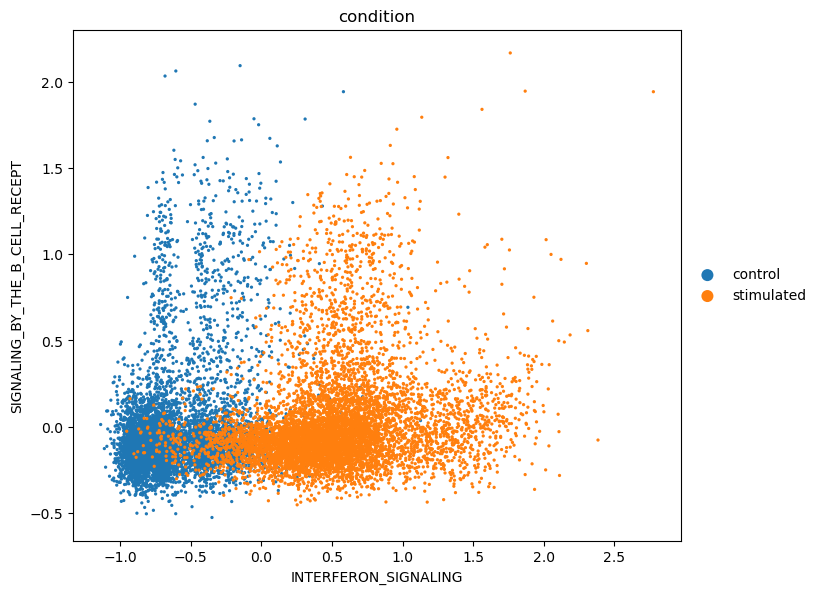

In [11]:
sc.pl.scatter(adata, x='INTERFERON_SIGNALING', y='SIGNALING_BY_THE_B_CELL_RECEPT', color='condition', size=22)

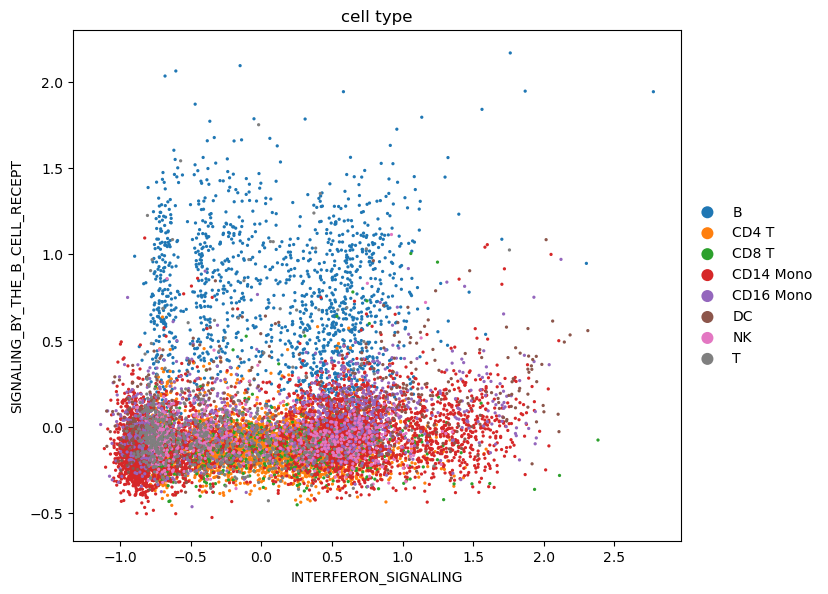

In [12]:
sc.pl.scatter(adata, x='INTERFERON_SIGNALING', y='SIGNALING_BY_THE_B_CELL_RECEPT', color='cell_type', size=22)